In [61]:
import pandas as pd
import numpy as np
import math

from sklearn.decomposition import PCA

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def choose_new(answer):
    return answer.index(max(answer))

In [62]:
df = pd.read_csv('mnist/mnist_train.csv')
df_test = pd.read_csv('mnist/mnist_test.csv')

In [63]:
epochs = 250
learning_rate = 0.001
perseps_list = []
for persep in range (10):   

    selecao = df['5'] == persep
    X_1 = df[selecao].copy()
    sample_len = X_1.shape[0]
    X_1['5'] = 1

    for i in range(10):
        if i != persep:
            selecao = df['5'] == i
            X_2 = df[selecao].copy()
            X_2['5'] = 0
            X_1 = pd.concat([X_1, X_2.sample(int(sample_len/9))])

    df_train = X_1.sample(frac = 1).reset_index(drop = True)

    X_train = df_train.iloc[:, 1:]
    X_train['b'] = 1
    X_train = X_train.values/255
    y_train = df_train.iloc[:, :1].values
    weight = np.random.normal(0, 0.5, X_train.shape[1])
    
    for i in range(epochs):
        j = 0
        for example in X_train:
            net = np.dot(example, weight)
            a = sigmoid(net)
            delta = y_train[j] - a
            weight = weight + learning_rate * delta * example
            j += 1
    perseps_list.append(weight)

In [68]:
for i in range(10):    

    selecao = df_test['7'] == i
    X_1 = df_test[selecao].copy()
    X_1['7'] = 1
    X_2 = df_test[~selecao].copy()
    X_2['7'] = 0
    df_test_adjusted = pd.concat([X_1, X_2])

    X_test = df_test_adjusted.iloc[:,1:]
    X_test['b'] = 1
    X_test = X_test.values/255
    y_test = df_test_adjusted.iloc[:, :1].values

    error = 0
    j = 0
    for example in X_test:
        net = np.dot(example, perseps_list[i])
        a = sigmoid(net)
        delta = y_test[j] - a
        error += abs(delta)
        j += 1
    print("A taxa de acerto do perseptron {} foi de {}%".format(i, 100-error*100/df_test.shape[0]))                               

A taxa de acerto do perseptron 0 foi de [96.94654425]%
A taxa de acerto do perseptron 1 foi de [97.53444926]%
A taxa de acerto do perseptron 2 foi de [92.1693932]%
A taxa de acerto do perseptron 3 foi de [89.7808998]%
A taxa de acerto do perseptron 4 foi de [94.96841961]%
A taxa de acerto do perseptron 5 foi de [89.65620245]%
A taxa de acerto do perseptron 6 foi de [95.51653762]%
A taxa de acerto do perseptron 7 foi de [95.38383507]%
A taxa de acerto do perseptron 8 foi de [81.83830308]%
A taxa de acerto do perseptron 9 foi de [89.19980254]%


In [69]:
df_test = pd.read_csv('mnist/mnist_test.csv')
X_test = df_test.iloc[:, 1:]
X_test['b'] = 1
X_test = X_test.values/255
y_test = df_test.iloc[:, :1].values

j = 0
error = 0
predicted = []
for example in X_test:
    answer = []
    for percep in perseps_list:
        net = np.dot(example, percep)
        a = sigmoid(net)
        answer.append(a)
    right_percep = choose_new(answer)
    delta = y_test[j] - right_percep
    if delta != 0:
        error += 1
    j += 1
    predicted.append(right_percep)
print("A taxa de acerto da rede foi de {}%".format(100-error*100/df_test.shape[0]))

A taxa de acerto da rede foi de 90.66906690669067%


In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

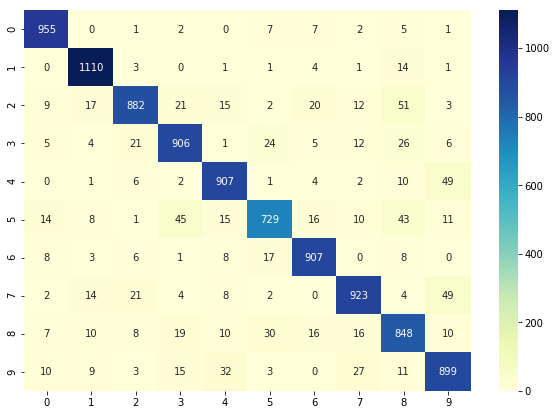

In [67]:
array = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(array, index = [i for i in'0123456789'], columns = [i for i in '0123456789'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt = "d")